In [1]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
df = pd.read_csv('review_data.csv')
df

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1
3,5,흠잡을곳 없는 반찬이 정갈합니다,1
4,5,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...,1
...,...,...,...
367,1,핵노맛 식당 분위기가 1점,0
368,5,깔끔친절죤맛,1
369,5,주말엔 점심특선 안 됨ㅠ 안 바쁠 때 가서 그런지 하나하나 잘 구워주시고 육즙 굿 ...,1
370,5,맛있고 직원분들이 친절해서 좋아요. 가성비도 좋음. 생각보다 고기가 많이서 한꺼번에...,1


In [3]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   372 non-null    int64 
 1   review  372 non-null    object
 2   y       372 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [4]:
df['y'].value_counts() # 1 - 긍정, 0 - 부정

y
1    222
0    150
Name: count, dtype: int64

In [5]:
import re

# 빈공백,한글을 제외하고 모든 문자는 제거
# 문자열을 정리
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅎ가-힣]') #빈공백,한글 반대인 것 선택
    result = hangul.sub('', text)
    return result

In [6]:
# df.columns

In [7]:
# df['review'].head()

In [8]:
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
df['ko_text']

# 한글자 이상의 텍스트를 가지고 데이터 추출
df = df[df['ko_text'].str.len()>0]
df.shape

(372, 4)

In [9]:
# 형태소 단위 추출
from konlpy.tag import Okt

# 형태소분석 함수생성
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x) #(단어,품사) 튜플
    pos = [ '{}/{}'.format(word,tag) for word,tag in pos] #pos튜플형태(단어,품사)
    return pos

In [10]:
df['ko_text'].values[0]

'너무 맛있어요'

In [11]:
# 형태소 추출 테스트
result = get_pos(df['ko_text'].values[0])
result

['너무/Adverb', '맛있어요/Adjective']

In [12]:
# CountVectorizer : 전체단어에서 각단어에 번호를 부여
from sklearn.feature_extraction.text import CountVectorizer

index_vectorizer = CountVectorizer(tokenizer=lambda x : get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].to_list())

c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
# 형태소 분석이 된 단어 총 개수 - 2343개
X.shape

(372, 2343)

In [14]:
print(sorted(index_vectorizer.vocabulary_))

['ㄴ/KoreanParticle', 'ㄷㄷㄷ/KoreanParticle', 'ㄹㅇ/KoreanParticle', 'ㅂㅂ/KoreanParticle', 'ㅅ/KoreanParticle', 'ㅇㅇ/KoreanParticle', 'ㅈㄴ/KoreanParticle', 'ㅈㅁㅌㅌㄱㄹ/KoreanParticle', 'ㅋ/KoreanParticle', 'ㅋㅋ/KoreanParticle', 'ㅋㅋㅋ/KoreanParticle', 'ㅋㅋㅋㅋ/KoreanParticle', 'ㅋㅋㅋㅋㅋ/KoreanParticle', 'ㅎ/KoreanParticle', 'ㅎㅎ/KoreanParticle', 'ㅎㅎㅎ/KoreanParticle', 'ㅎㅎㅎㅎ/KoreanParticle', '가/Josa', '가/Verb', '가게/Noun', '가격/Noun', '가고/Verb', '가고싶지/Verb', '가급적/Adverb', '가기/Noun', '가까/Adjective', '가까히/Adjective', '가나/Noun', '가네요/Verb', '가는/Verb', '가는게/Verb', '가능/Noun', '가능하고/Adjective', '가득/Noun', '가득가득/Adverb', '가득해서/Adjective', '가려고요/Verb', '가려는데/Verb', '가맹/Noun', '가면/Noun', '가본/Verb', '가서/Verb', '가성/Noun', '가세/Noun', '가스/Noun', '가슴/Noun', '가시길/Verb', '가시는거라면/Verb', '가시던데/Verb', '가심/Verb', '가장/Noun', '가정/Noun', '가져가/Verb', '가져다/Verb', '가져다가/Verb', '가져다줄/Verb', '가족/Noun', '가지/Noun', '가진/Verb', '각/Noun', '간/Noun', '간/Suffix', '간곳/Noun', '간다/Noun', '간단하게/Adjective', '간하면/Verb', '갈/Verb', '갈릴/Noun', '갈만/Verb', '갈비

In [15]:
# 확인
print(index_vectorizer.vocabulary_)

{'너무/Adverb': 411, '맛있어요/Adjective': 750, '녹는다/Verb': 430, '녹아/Verb': 431, '좋아요/Adjective': 1888, '흠잡을/Adjective': 2334, '곳/Noun': 178, '없는/Adjective': 1470, '반찬/Noun': 933, '이/Josa': 1640, '정갈합니다/Adjective': 1845, '코로나/Noun': 2075, '땜/Noun': 642, '에/Josa': 1492, '걱정/Noun': 131, '했는데/Verb': 2281, '방역/Noun': 945, '수/Modifier': 1199, '칙/Noun': 2053, '도/Josa': 544, '잘/Verb': 1769, '지키시고/Verb': 1953, '살치실이랑/Verb': 1132, '등심/Noun': 625, '부드러워서/Adjective': 1022, '좋아서/Adjective': 1887, '댓글/Noun': 527, '남깁니다/Verb': 383, '살치/Verb': 1131, '살/Noun': 1127, '미쳤네요/Adjective': 910, '대박/Noun': 515, '입니다/Adjective': 1727, '퀄리티/Noun': 2081, '굳이/Noun': 231, '에요/Josa': 1502, '최고/Noun': 2030, '외식/Noun': 1578, '하기에/Verb': 2179, '딱/Adverb': 631, '좋습니다/Adjective': 1885, '격/Noun': 145, '자체/Noun': 1764, '가/Josa': 17, '다른/Noun': 473, '음식/Noun': 1630, '의/Josa': 1633, '품격/Noun': 2160, '서비스/Noun': 1163, '마인드/Noun': 686, '뭐/Noun': 899, '하나/Noun': 2182, '정말/Noun': 1848, '멋진/Adjective': 830, '식당/Noun': 1247, '이네/Josa'

In [16]:
from konlpy.tag import Okt

okt = Okt()
m_list = okt.pos("아버지 가방에 들어가신다.",stem=True) #stem=True 어간추출 
print(m_list)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [17]:
print(df['ko_text'].values[0])
print(X[0])

너무 맛있어요
  (0, 411)	1
  (0, 750)	1


In [18]:
# 변환기
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로 ,형태소를 벡터 형태 데이터로 변환
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [19]:
print(X.shape)
print(X[1])

(372, 2343)
  (0, 430)	0.7071067811865476
  (0, 431)	0.7071067811865476


In [20]:
print(X[0])

  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876


In [21]:
# data
df['ko_text'].head()

0                                              너무 맛있어요
1                                               녹는다 녹아
2                                                  좋아요
3                                   흠잡을곳 없는 반찬이 정갈합니다 
4    코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...
Name: ko_text, dtype: object

In [22]:
print(X)

  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876
  (1, 430)	0.7071067811865476
  (1, 431)	0.7071067811865476
  (2, 1888)	1.0
  (3, 178)	0.3042004605770822
  (3, 933)	0.4174595892176754
  (3, 1470)	0.43039286289644935
  (3, 1640)	0.19025362148557404
  (3, 1845)	0.5225666594189886
  (3, 2334)	0.4885480536221607
  (4, 131)	0.27027309313102715
  (4, 383)	0.27027309313102715
  (4, 411)	0.14027794721287554
  (4, 527)	0.24019504854904306
  (4, 544)	0.10095305374438543
  (4, 625)	0.23051208095882778
  (4, 642)	0.27027309313102715
  (4, 945)	0.27027309313102715
  (4, 1022)	0.2526785649555473
  (4, 1132)	0.27027309313102715
  (4, 1199)	0.27027309313102715
  (4, 1492)	0.10860241748505198
  (4, 1769)	0.17740824814668021
  (4, 1887)	0.27027309313102715
  :	:
  (371, 1154)	0.17569017317347246
  (371, 1163)	0.24578160535331572
  (371, 1191)	0.14984365240753128
  (371, 1226)	0.12760302633895593
  (371, 1254)	0.17569017317347246
  (371, 1492)	0.21178997858018142
  (371, 1562)	0.1498436524075

In [23]:
from sklearn.model_selection import train_test_split
target = df['y']
train_input,test_input,train_target,test_target = train_test_split(
    X,target,test_size=0.3
)

In [24]:
print(train_input.shape,test_input.shape)

(260, 2343) (112, 2343)


In [25]:
# 로지스틱 회귀 모델로 구현하시오.
# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input,train_target)

LogisticRegression()

In [26]:
# 과대적합
print(lr.score(train_input,train_target)) 
print(lr.score(test_input,test_target))

0.9846153846153847
0.75


In [27]:
predict = lr.predict(test_input)
predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=test_target,y_pred=predict)
print(confmat)

[[21 23]
 [ 5 63]]


In [29]:
# 1.
df['y'].value_counts()

y
1    222
0    150
Name: count, dtype: int64

In [30]:
# 1:1 비율을 랜덤 샘플링 수행
# dfidf수치로 변경된 X의 데이터를 가져오기 위해 index번호를 저장
positive_random_idx = df[df['y']==1].sample(50,random_state=30).index.to_list()
negative_random_idx = df[df['y']==0].sample(50,random_state=30).index.to_list()

In [38]:
random_idx = positive_random_idx + negative_random_idx

In [43]:
# 랜덤 100개 데이터셋 나누기
sample_X = X[random_idx,:]
y = df['y'][random_idx]
train_input,test_input,train_target,test_target = train_test_split(
    sample_X,y,test_size=0.3
)
print(train_input.shape,test_input.shape)

(70, 2343) (30, 2343)


In [44]:
# 로지스틱 회귀 모델로 구현하시오.
# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input,train_target)

LogisticRegression()

In [45]:
# 과대적합 - 데이터를 추가해서 늘려서 다시 테스트
print(lr.score(train_input,train_target)) 
print(lr.score(test_input,test_target))

0.9857142857142858
0.6


In [71]:
lr.coef_[0][6]

0.0

In [64]:
len(lr.coef_[0])

2343

In [47]:
print(lr.coef_,lr.intercept_) # 기울기,절편

[[ 0.         -0.07633746  0.         ...  0.          0.
   0.        ]] [-0.167214]


<BarContainer object of 2343 artists>

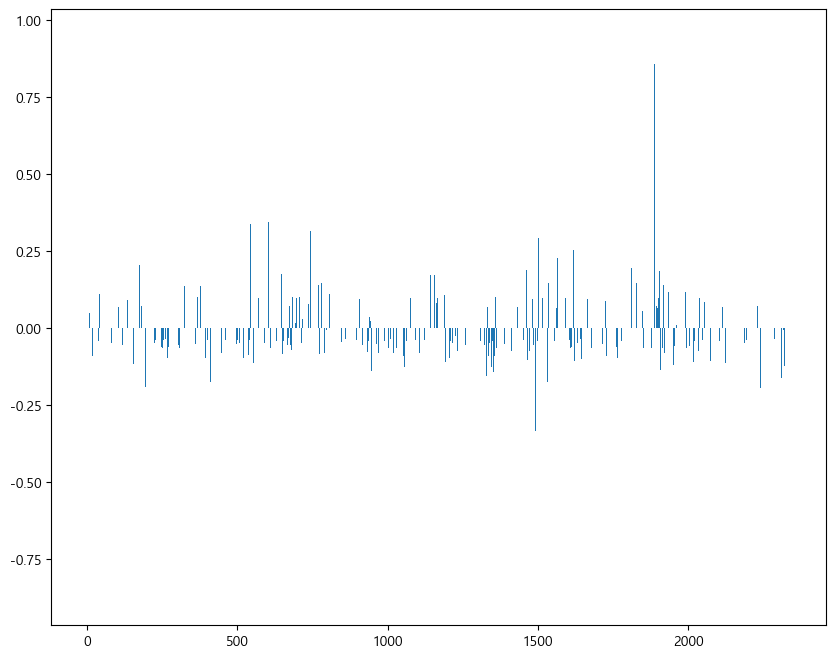

In [48]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])

In [52]:
# vectorizer 위치를 바꿈. - 번호로 찾을수 있도록 위치를 변경
invert_index_vectorizer = {v:k for k,v in index_vectorizer.vocabulary_.items() }

In [54]:
print(index_vectorizer.vocabulary_.items())
print(invert_index_vectorizer.items())

dict_items([('너무/Adverb', 411), ('맛있어요/Adjective', 750), ('녹는다/Verb', 430), ('녹아/Verb', 431), ('좋아요/Adjective', 1888), ('흠잡을/Adjective', 2334), ('곳/Noun', 178), ('없는/Adjective', 1470), ('반찬/Noun', 933), ('이/Josa', 1640), ('정갈합니다/Adjective', 1845), ('코로나/Noun', 2075), ('땜/Noun', 642), ('에/Josa', 1492), ('걱정/Noun', 131), ('했는데/Verb', 2281), ('방역/Noun', 945), ('수/Modifier', 1199), ('칙/Noun', 2053), ('도/Josa', 544), ('잘/Verb', 1769), ('지키시고/Verb', 1953), ('살치실이랑/Verb', 1132), ('등심/Noun', 625), ('부드러워서/Adjective', 1022), ('좋아서/Adjective', 1887), ('댓글/Noun', 527), ('남깁니다/Verb', 383), ('살치/Verb', 1131), ('살/Noun', 1127), ('미쳤네요/Adjective', 910), ('대박/Noun', 515), ('입니다/Adjective', 1727), ('퀄리티/Noun', 2081), ('굳이/Noun', 231), ('에요/Josa', 1502), ('최고/Noun', 2030), ('외식/Noun', 1578), ('하기에/Verb', 2179), ('딱/Adverb', 631), ('좋습니다/Adjective', 1885), ('격/Noun', 145), ('자체/Noun', 1764), ('가/Josa', 17), ('다른/Noun', 473), ('음식/Noun', 1630), ('의/Josa', 1633), ('품격/Noun', 2160), ('서비스/Noun', 1163), ('마인

In [59]:
lr.coef_[0]

array([ 0.        , -0.07633746,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [73]:
print(lr.coef_[0][:20])

[ 0.         -0.07633746  0.          0.          0.          0.
  0.          0.          0.          0.04972936  0.09719803  0.
  0.          0.          0.23532448 -0.11572491 -0.04126102 -0.3580928
 -0.08204831 -0.09084014]


In [60]:
# 2343개의 기울기값 index부여, 역순정렬

coef_pos_index = sorted(((value,index) for index,value in enumerate(lr.coef_[0])),reverse=True)

In [61]:
coef_pos_index

[(0.9452755350425133, 2030),
 (0.8591554797099832, 1888),
 (0.6794233782209207, 750),
 (0.4951513854841255, 1956),
 (0.4331122374998056, 1567),
 (0.3997714055428712, 732),
 (0.3478410414879452, 1137),
 (0.34391151036697515, 604),
 (0.33885284427686174, 544),
 (0.3173207360382901, 744),
 (0.30734735324767093, 159),
 (0.2951670001939716, 1752),
 (0.29492940836571024, 652),
 (0.2945674393550059, 1502),
 (0.27273257046674176, 761),
 (0.258541743265637, 749),
 (0.258541743265637, 34),
 (0.25543556768851555, 1618),
 (0.23532448314931437, 14),
 (0.23184656451480892, 1065),
 (0.22980238714146703, 1565),
 (0.22980238714146703, 844),
 (0.21217019872772458, 1977),
 (0.21217019872772458, 306),
 (0.20947274944978622, 1630),
 (0.20653964043419146, 175),
 (0.2060449161787848, 2068),
 (0.1988792252800346, 2063),
 (0.1972541203926114, 1811),
 (0.19084233418045005, 1677),
 (0.1885385490369547, 1462),
 (0.18560152158449902, 1904),
 (0.18443550069673226, 2078),
 (0.18186243733000218, 731),
 (0.17528386841

In [75]:
invert_index_vectorizer[2030]

'최고/Noun'

In [62]:
# 긍정의 표현중에 높은 20개를 출력
# (0.9452755350425133, 2030)
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0]) # 2030단어,0.9452755350425133

최고/Noun 0.9452755350425133
좋아요/Adjective 0.8591554797099832
맛있어요/Adjective 0.6794233782209207
직원/Noun 0.4951513854841255
완전/Noun 0.4331122374998056
맛있고/Adjective 0.3997714055428712
삼겹살/Noun 0.3478410414879452
들/Suffix 0.34391151036697515
도/Josa 0.33885284427686174
맛있당/Adjective 0.3173207360382901
고기/Noun 0.30734735324767093
있으나/Adjective 0.2951670001939716
또/Noun 0.29492940836571024
에요/Josa 0.2945674393550059
맛집/Noun 0.27273257046674176
맛있어여/Adjective 0.258541743265637
가득가득/Adverb 0.258541743265637
육즙/Noun 0.25543556768851555
ㅎㅎ/KoreanParticle 0.23532448314931437
븐/Noun 0.23184656451480892


In [76]:
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]],coef[0]) # 2030단어,0.9452755350425133

할말은/Verb -0.1925815256439691
않습니다/Verb -0.1925815256439691
많지만/Adjective -0.1925815256439691
본/Verb -0.19509436771980604
좀/Noun -0.19920153354285716
안/VerbPrefix -0.20675621484322357
맛있다/Adjective -0.20914643258177124
술안주/Noun -0.229608808694873
인가/Josa -0.2488831858299148
턱/Noun -0.24952963626555924
볶음밥/Noun -0.2670064020938543
쏘/Verb -0.28564075729237653
제일/Noun -0.32445800071830544
에/Josa -0.3336467230929014
가/Josa -0.35809280332934296
점/Noun -0.3592432957744931
곱창/Noun -0.41993713671844174
이에요/Josa -0.5728915102824951
보통/Noun -0.5834170305945736
별로/Noun -0.8735702455983707


In [49]:
index_vectorizer.vocabulary_

{'너무/Adverb': 411,
 '맛있어요/Adjective': 750,
 '녹는다/Verb': 430,
 '녹아/Verb': 431,
 '좋아요/Adjective': 1888,
 '흠잡을/Adjective': 2334,
 '곳/Noun': 178,
 '없는/Adjective': 1470,
 '반찬/Noun': 933,
 '이/Josa': 1640,
 '정갈합니다/Adjective': 1845,
 '코로나/Noun': 2075,
 '땜/Noun': 642,
 '에/Josa': 1492,
 '걱정/Noun': 131,
 '했는데/Verb': 2281,
 '방역/Noun': 945,
 '수/Modifier': 1199,
 '칙/Noun': 2053,
 '도/Josa': 544,
 '잘/Verb': 1769,
 '지키시고/Verb': 1953,
 '살치실이랑/Verb': 1132,
 '등심/Noun': 625,
 '부드러워서/Adjective': 1022,
 '좋아서/Adjective': 1887,
 '댓글/Noun': 527,
 '남깁니다/Verb': 383,
 '살치/Verb': 1131,
 '살/Noun': 1127,
 '미쳤네요/Adjective': 910,
 '대박/Noun': 515,
 '입니다/Adjective': 1727,
 '퀄리티/Noun': 2081,
 '굳이/Noun': 231,
 '에요/Josa': 1502,
 '최고/Noun': 2030,
 '외식/Noun': 1578,
 '하기에/Verb': 2179,
 '딱/Adverb': 631,
 '좋습니다/Adjective': 1885,
 '격/Noun': 145,
 '자체/Noun': 1764,
 '가/Josa': 17,
 '다른/Noun': 473,
 '음식/Noun': 1630,
 '의/Josa': 1633,
 '품격/Noun': 2160,
 '서비스/Noun': 1163,
 '마인드/Noun': 686,
 '뭐/Noun': 899,
 '하나/Noun': 2182,
 '정말/Noun': 1

In [31]:
# pos - 말뭉치,품사 튜플형태로 전달
# morphs - 모든 형태소단위로 분리 
# nouns - 명사만 추출

In [32]:
m_list = okt.pos("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"
                 , stem=True)
print(m_list)

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('하다', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [33]:
m_list = okt.morphs("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"
                 , stem=True)
print(m_list)

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [34]:
m_list = okt.nouns("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ")
print(m_list)

['한글', '자연어', '처리', '이제']
